## Exploratory data analysis

In [1]:
import os
from os import path
import codecs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from utils.read_data import get_data_full
from models.doc_embedding.utils import get_shortest_paths

In [2]:
def get_all_texts():
    text_path = './data/text/'
    filenames = os.listdir(text_path)
    all_texts = []
    for filename in filenames:
        try:
            with codecs.open(path.join(text_path, filename), encoding='utf-8') as f:
                all_texts.append(f.read().replace("\n", "").lower())
        except:
            with codecs.open(path.join(text_path, filename), encoding='latin-1') as f:
                all_texts.append(f.read().replace("\n", "").lower())
    return all_texts

In [3]:
G = nx.read_weighted_edgelist('./data/edgelist.txt', create_using=nx.DiGraph())
sp = get_shortest_paths()
all_texts = get_all_texts()
X_train, y_train, X_test, test_hosts = get_data_full()

In [4]:
train_hosts = [u[0] for u in X_train]

## Watch out for imbalance

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

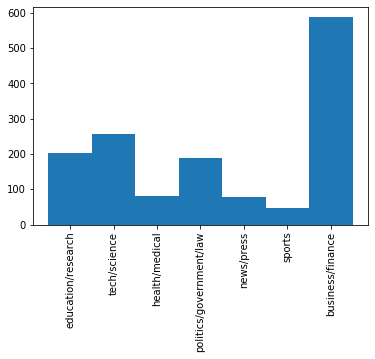

In [5]:
plt.hist(y_train, bins=np.arange(8) + 0.5)
plt.xticks(rotation=90)

In [6]:
labels = ['business/finance', 'education/research', 'entertainment', 'health/medical',
          'news/press', 'politics/government/law', 'sports', 'tech/science']
weights = {label: len(y_train) / ( 8 * len([l for l in y_train if l == label ])) for label in labels}
weights

{'business/finance': 0.4244037478705281,
 'education/research': 1.2272167487684729,
 'entertainment': 0.45295454545454544,
 'health/medical': 3.038109756097561,
 'news/press': 3.153481012658228,
 'politics/government/law': 1.318121693121693,
 'sports': 5.415760869565218,
 'tech/science': 0.9693579766536965}

## Distribution of doc lengths

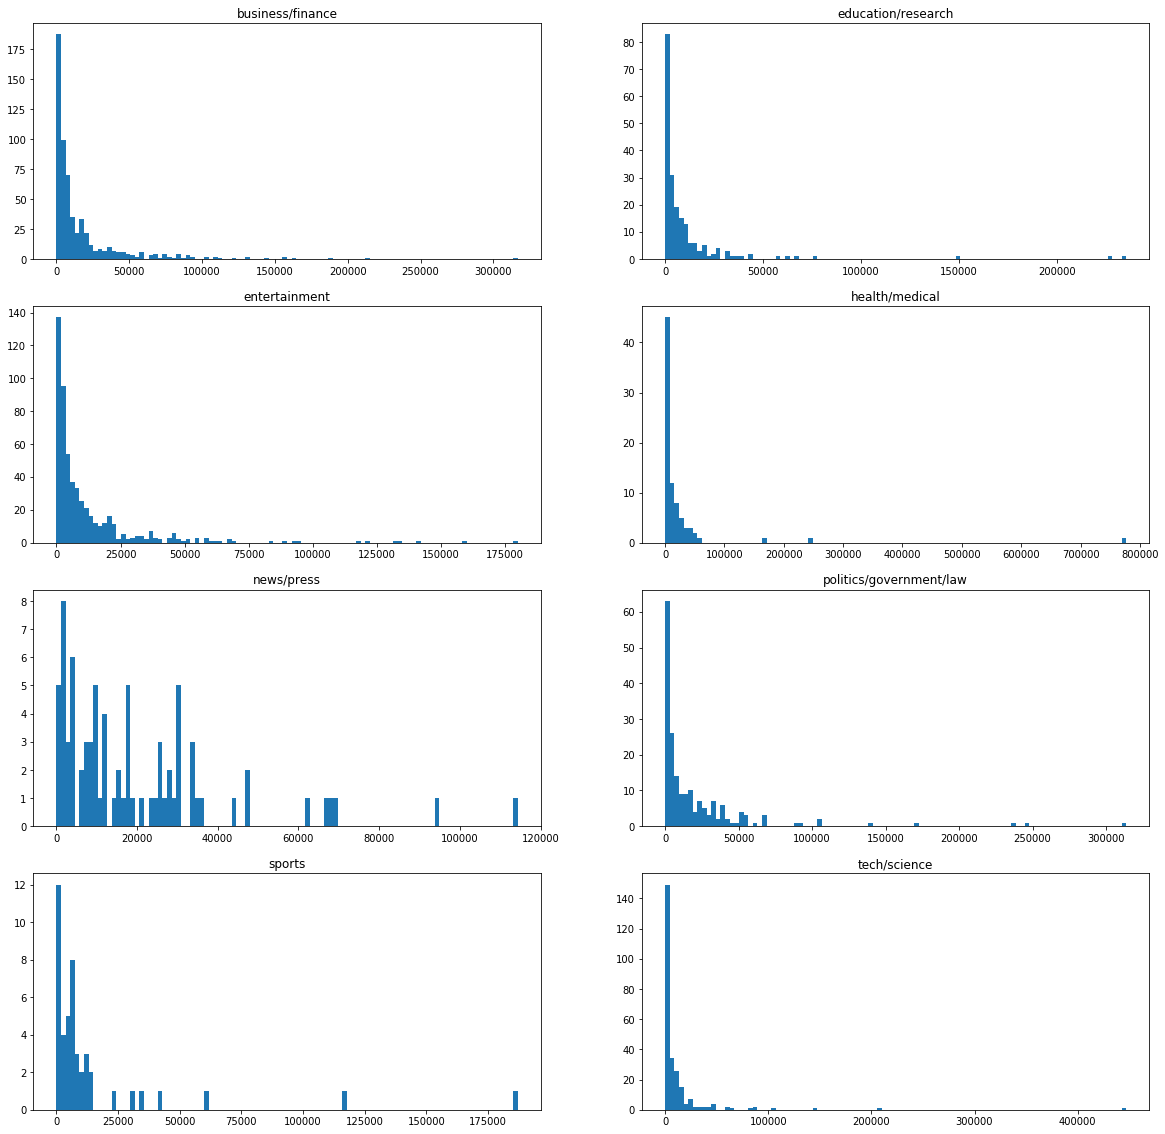

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    lb = labels[i]
    features = []
    for u in range(len(y_train)):
        x = X_train[u]
        if lb == y_train[u]:
            features.append(len(x[1].split(' ')))
    ax[i // 2, i % 2].hist(features, bins=100)
    ax[i // 2, i % 2].set_title(lb)


In [8]:
labels = ['business/finance', 'education/research', 'entertainment', 'health/medical',
          'news/press', 'politics/government/law', 'sports', 'tech/science']
labels_subset = ['news/press', 'politics/government/law']#, 'sports', 'tech/science']

In [9]:
train_hosts_subset = [X_train[i][0] for i in range(len(X_train)) if y_train[i] in labels_subset]
G_labeled_subset = G.subgraph(train_hosts_subset)

In [10]:
y_graph = []
nodes = G_labeled_subset.nodes()
for n in nodes:
    for i in range(len(train_hosts)):
        if train_hosts[i] == n:
            y_graph.append(y_train[i])
            break
node_color = LabelEncoder().fit_transform(y_graph)

# ???

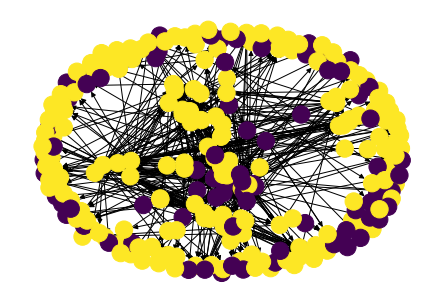

In [11]:
nx.draw(G_labeled_subset, node_color=node_color)
plt.show()